In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
with open("CALIB_fwd.txt", "r") as file:
    raw_data = file.read().strip().split("ModeConstantDC")[1:-1]

ndata = len(raw_data)
columns = list(map(lambda x: (x.split(" = ")[0]), raw_data[0].strip().split("\n")))

data_np = np.zeros((len(columns), ndata))
for i in range(ndata):
    data_np[:,i] = list(map(lambda x: float(x.split(" = ")[-1]), raw_data[i].strip().split("\n")))

data = pd.DataFrame(data_np.T, columns=columns)
data.insert(0,"time",np.cumsum(data["dt"]),False)
print(str(data.columns))

Index(['time', 'dt', 'xpos', 'ypos', 'thetapos', 'vfwd', 'omega', 'speed_left',
       'speed_right', 'dc left', 'dc right'],
      dtype='object')


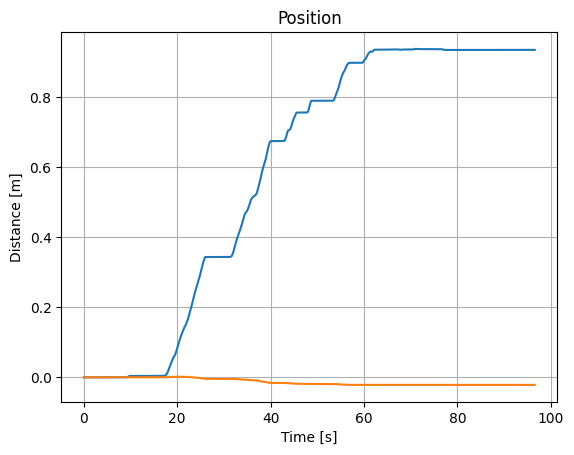

0.9357536728
1.4753882780592384


In [23]:
plt.title("Position")
plt.plot(data["time"], data["xpos"], label="x")
plt.plot(data["time"], data["ypos"], label="y")
plt.xlabel("Time [s]")
plt.ylabel("Distance [m]")
plt.grid()
plt.show()
final_xpos = data["xpos"][ndata-1] 
print(final_xpos)
corrected_tick_to_m = 1.3806/final_xpos
print(corrected_tick_to_m)

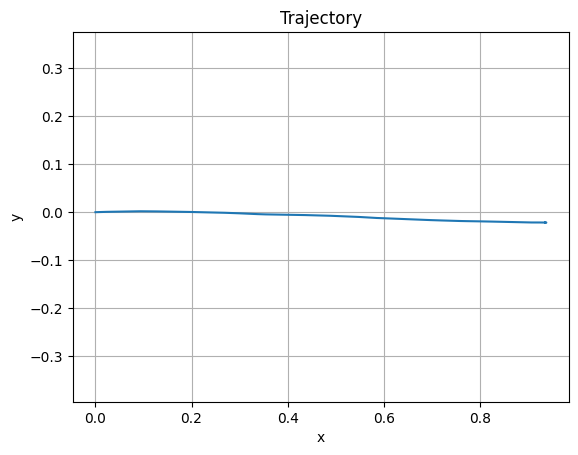

In [10]:
plt.title("Trajectory")
plt.plot(data["xpos"], data["ypos"])
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.grid()
plt.show()

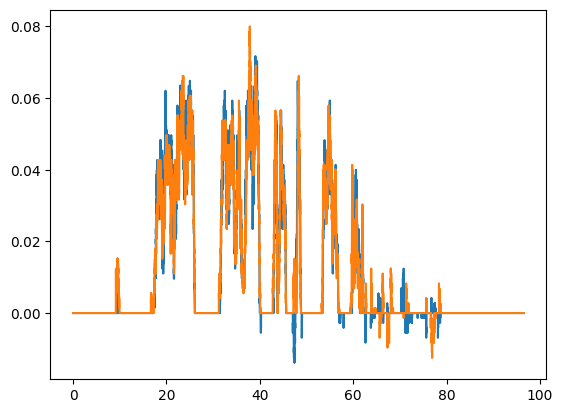

In [11]:
plt.plot(data["time"], data["speed_left"])
plt.plot(data["time"], data["speed_right"])
plt.show()

## After calibration data

In [26]:
with open("CALIB_fwd_after_calib.txt", "r") as file:
    raw_data = file.read().strip().split("ModeConstantDC")[1:-1]

ndata = len(raw_data)
columns = list(map(lambda x: (x.split(" = ")[0]), raw_data[0].strip().split("\n")))

data_np = np.zeros((len(columns), ndata))
for i in range(ndata):
    data_np[:,i] = list(map(lambda x: float(x.split(" = ")[-1]), raw_data[i].strip().split("\n")))

data_after_calib = pd.DataFrame(data_np.T, columns=columns)
data_after_calib.insert(0,"time",np.cumsum(data["dt"]),False)
print(str(data_after_calib.columns))

Index(['time', 'dt', 'xpos', 'ypos', 'thetapos', 'vfwd', 'omega', 'speed_left',
       'speed_right', 'dc left', 'dc right'],
      dtype='object')


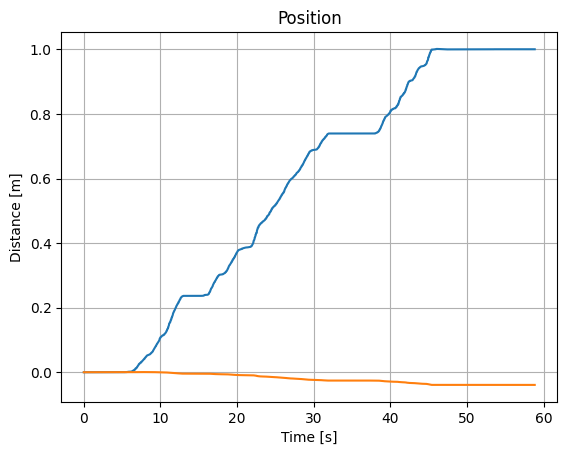

1.0006128636


In [29]:
plt.title("Position")
plt.plot(data_after_calib["time"], data_after_calib["xpos"], label="x")
plt.plot(data_after_calib["time"], data_after_calib["ypos"], label="y")
plt.xlabel("Time [s]")
plt.ylabel("Distance [m]")
plt.grid()
plt.show()
final_xpos_after_calib = data_after_calib["xpos"][ndata-1] 
print(final_xpos_after_calib)